Use of billboard datas to learn how to handle sql with python<br>
data: https://components.one/datasets/billboard-200-with-segments/<br>
In parallel we learned how to use sql with a dedicated client.

# Importing libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import rcParams
import seaborn as sns
import sqlite3
rcParams['figure.figsize'] = 15, 8
sns.set_palette(sns.color_palette("hls", 30))



# Exploring sql

In [2]:
conn = sqlite3.connect('billboard/billboard-200.db')
c = conn.cursor()

Effectuez la moyenne par année de la caractéristique « acousticness ». Quelle est la
tendance de cette caractéristique

In [3]:
query="""SELECT AVG(acousticness) AS AvgAc,SUBSTR(date,1,4) AS Yr 
FROM acoustic_features GROUP BY SUBSTR(date,1,4) ORDER BY SUBSTR(date,1,4) DESC"""
c.execute(query)
avg_accousticness=c.fetchall()
#fetchall equivalent to [item for titem in cursor] and list(cursor)
avg_accousticness=[[avg_accousticness[k][0],int(avg_accousticness[k][1])] for k in range(0,len(avg_accousticness))]

## Average acousticness

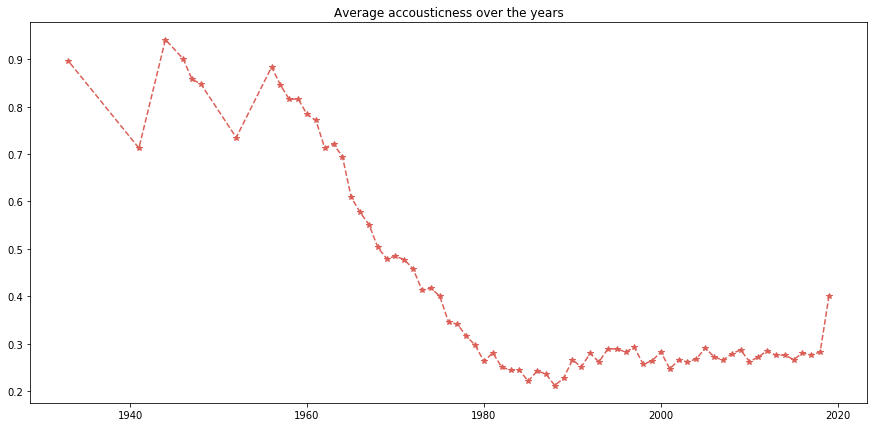

In [4]:
y,x=zip(*avg_accousticness)
plt.figure(figsize=(15,7))
plt.title('Average accousticness over the years')
plt.plot(x,y, '--*');

## Average loundness

Quelle est l’année dont le niveau sonore «loudness » a été le plus haut ?

In [5]:
query="""SELECT AVG(loudness) AS AvgAc,SUBSTR(date,1,4) 
AS Yr FROM acoustic_features GROUP BY SUBSTR(date,1,4) ORDER BY SUBSTR(date,1,4) DESC """
c.execute(query)
avg_loudness=c.fetchall()
avg_loudness=avg_loudness[:-2]
avg_loudness=[[avg_loudness[k][0],int(avg_loudness[k][1])] for k in range(0,len(avg_loudness))]

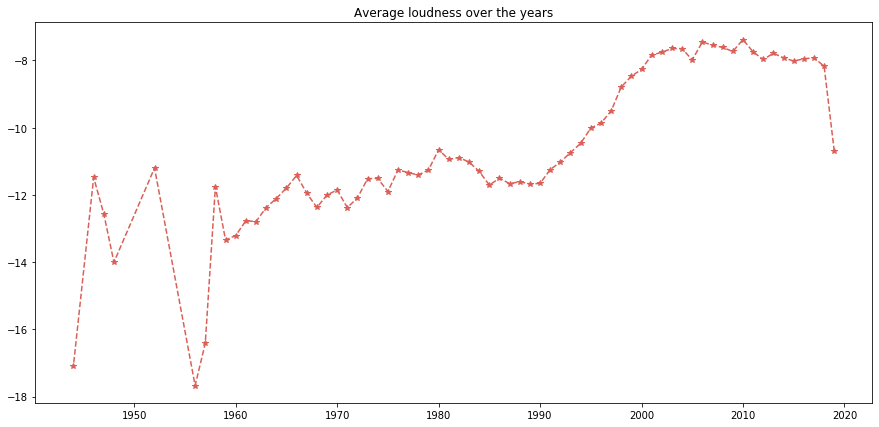

In [6]:
y,x=zip(*avg_loudness)
plt.figure(figsize=(15,7))
plt.title('Average loudness over the years')
plt.plot(x,y,'--*');

Quelle est la clé musicale la plus utilisée - en prenant en compte le mode (e.g. majeur,
mineur) ?

In [7]:
(c.execute("SELECT key,COUNT(key) FROM acoustic_features WHERE key IS NOT NULL GROUP BY key "))
key=c.fetchall()
pitch = ['C, B♯', 'C♯, D♭', 'D', 'D♯, E♭', 'E', 'F', 'F♯, G♭', 'G', 'G♯, A♭', 'A', 'A♯, B♭', 'B' ]
key=[[pitch[k],key[k][1]] for k in range(0,len(key))]

In [8]:
(c.execute("SELECT key,COUNT(key) FROM acoustic_features WHERE key IS NOT NULL GROUP BY key "))
key=c.fetchall()
key

[(0, 41103),
 (1, 29207),
 (2, 39098),
 (3, 10399),
 (4, 27185),
 (5, 27829),
 (6, 19532),
 (7, 42139),
 (8, 19144),
 (9, 37738),
 (10, 22027),
 (11, 24449)]

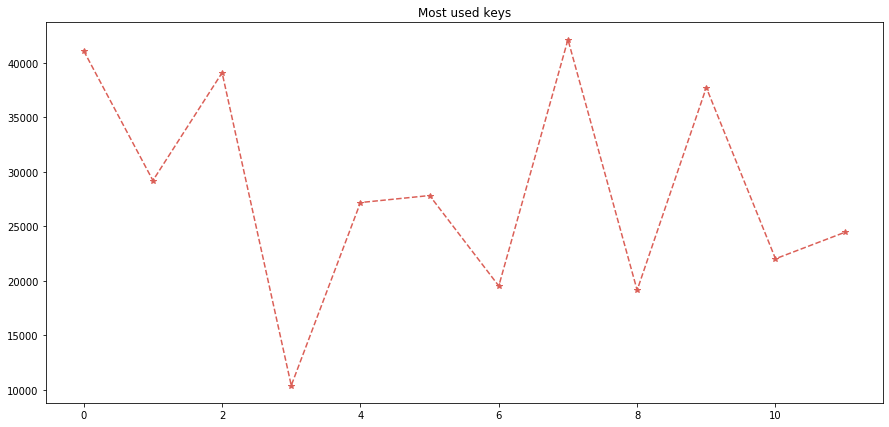

In [9]:
x,y=zip(*key)
plt.figure(figsize=(15,7))
plt.title('Most used keys')
plt.plot(x,y,'--*');

# Pandas

In [10]:
#Create the connexion
cnx=sqlite3.connect('billboard/billboard-200.db')

In [11]:
#Query and transformation into df via connexion
albums_df=pd.read_sql_query('SELECT * from albums',cnx)
albums_df.dropna(inplace=True)
# albums_df.date=pd.to_datetime(albums_df.date)
# albums_df.index=albums_df.date
# albums_df.drop('date',axis=1,inplace=True)

albums_df = albums_df.rename(columns={'date': 'date_wb'})
albums_df.head(5)

,id,date_wb,artist,album,rank,length,track_length
1,2,2019-01-19,A Boogie Wit da Hoodie,Hoodie SZN,1.0,20.0,185233.800000
2,3,2019-01-19,21 Savage,I Am > I Was,2.0,15.0,211050.733333
3,4,2019-01-19,Soundtrack,Spider-Man: Into The Spider-Verse,3.0,13.0,190866.384615
4,5,2019-01-19,Meek Mill,Championships,4.0,19.0,219173.894737
5,6,2019-01-19,Post Malone,beerbongs & bentleys,5.0,18.0,214113.611111


In [12]:
albums_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468867 entries, 1 to 573946
Data columns (total 7 columns):
id              468867 non-null int64
date_wb         468867 non-null object
artist          468867 non-null object
album           468867 non-null object
rank            468867 non-null float64
length          468867 non-null float64
track_length    468867 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 28.6+ MB


In [13]:
pitch = ['C, B♯', 'C♯, D♭', 'D', 'D♯, E♭', 'E', 'F', 'F♯, G♭', 'G', 'G♯, A♭', 'A', 'A♯, B♭', 'B' ]
def pitch_key(x):
    return pitch[int(x)]

def mode_key(row):
    if row['mode']==0:
        return row['key'] + ' minor'
    else:
        return row['key'] + ' major'

acoustic_features_df=pd.read_sql_query('SELECT * from acoustic_features',cnx)
acoustic_features_df.dropna(inplace=True)
# acoustic_features_df.date=pd.to_datetime(acoustic_features_df.date)
# acoustic_features_df.index=acoustic_features_df.date
# acoustic_features_df.drop('date',axis=1,inplace=True)

acoustic_features_df = acoustic_features_df.rename(columns={'date': 'date_album'})
acoustic_features_df.key=acoustic_features_df.key.apply(lambda x: pitch_key(x))
acoustic_features_df['pitch_mode']=acoustic_features_df.apply(mode_key,axis=1)
acoustic_features_df.drop(['mode','key'],axis=1,inplace=True)
acoustic_features_df.head(5)

,id,song,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,album_id,date_album,pitch_mode
0,0Veyvc3n9AcLSoK3r1dA12,Voices In My Head,Hoodie SZN,A Boogie Wit da Hoodie,0.0555,0.754,142301.0,0.663,0.000000,0.101,-6.311,0.427,90.195,4.0,0.207,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21,"F♯, G♭ minor"
1,77JzXZonNumWsuXKy9vr3U,Beasty,Hoodie SZN,A Boogie Wit da Hoodie,0.2920,0.860,152829.0,0.418,0.000000,0.106,-9.061,0.158,126.023,4.0,0.374,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21,G minor
2,18yllZD0TdF7ykcREib8Z1,I Did It,Hoodie SZN,A Boogie Wit da Hoodie,0.1530,0.718,215305.0,0.454,0.000046,0.116,-9.012,0.127,89.483,4.0,0.196,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21,"G♯, A♭ major"
3,1wJRveJZLSb1rjhnUHQiv6,Swervin (feat. 6ix9ine),Hoodie SZN,A Boogie Wit da Hoodie,0.0153,0.581,189487.0,0.662,0.000000,0.111,-5.239,0.303,93.023,4.0,0.434,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21,A major
4,0jAfdqv18goRTUxm3ilRjb,Startender (feat. Offset and Tyga),Hoodie SZN,A Boogie Wit da Hoodie,0.0235,0.736,192779.0,0.622,0.000000,0.151,-4.653,0.133,191.971,4.0,0.506,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21,"F♯, G♭ minor"


In [14]:
acoustic_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339850 entries, 0 to 339854
Data columns (total 18 columns):
id                  339850 non-null object
song                339850 non-null object
album               339850 non-null object
artist              339850 non-null object
acousticness        339850 non-null float64
danceability        339850 non-null float64
duration_ms         339850 non-null float64
energy              339850 non-null float64
instrumentalness    339850 non-null float64
liveness            339850 non-null float64
loudness            339850 non-null float64
speechiness         339850 non-null float64
tempo               339850 non-null float64
time_signature      339850 non-null float64
valence             339850 non-null float64
album_id            339850 non-null object
date_album          339850 non-null object
pitch_mode          339850 non-null object
dtypes: float64(11), object(7)
memory usage: 49.3+ MB


In [15]:
acoustic_features_df.loc[(acoustic_features_df.artist=='Kendrick Lamar') & (acoustic_features_df.speechiness>0.5)]

,id,song,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,album_id,date_album,pitch_mode
841,06FCvd7rrRcF3DdvWH5Isp,LUST.,DAMN.,Kendrick Lamar,0.1930,0.678,307880.0,0.562,0.0000,0.104,-9.197,0.508,94.241,4.0,0.5660,4eLPsYPBmXABThSJ821sqY,2017-04-14,"D♯, E♭ minor"
846,0y9uTzK9cNKSAEHnpeRG8C,DUCKWORTH.,DAMN.,Kendrick Lamar,0.0536,0.552,248613.0,0.731,0.0000,0.258,-6.873,0.615,174.516,4.0,0.6320,4eLPsYPBmXABThSJ821sqY,2017-04-14,G major
2192,0qGFnxDIqGBIq2D3zNbjk9,Sherane a.k.a Master Splinter’s Daughter,"good kid, m.A.A.d city",Kendrick Lamar,0.4860,0.503,273640.0,0.508,0.0102,0.124,-11.094,0.520,81.908,4.0,0.3170,3DGQ1iZ9XKUQxAUWjfC34w,2012,"A♯, B♭ minor"
14092,1WT11QmhZutciEv1NsHt1R,Mortal Man,To Pimp A Butterfly,Kendrick Lamar,0.6650,0.567,727107.0,0.525,0.0000,0.708,-9.043,0.750,86.935,4.0,0.4160,7ycBtnsMtyVbbwTfJwRjSP,2015-03-16,"A♯, B♭ minor"
30334,3I0FBDc1c1BLNtXWKVjmFg,untitled 02 | 06.23.2014.,untitled unmastered.,Kendrick Lamar,0.3410,0.526,258827.0,0.506,0.0000,0.646,-10.470,0.519,85.349,3.0,0.0963,0kL3TYRsSXnu0iJvFO3rud,2016-03-04,F major
30337,3V8vWoCbKbfjNrPaQ4YtSg,untitled 05 | 09.21.2014.,untitled unmastered.,Kendrick Lamar,0.3740,0.488,338427.0,0.630,0.0000,0.163,-9.839,0.508,154.152,4.0,0.4130,0kL3TYRsSXnu0iJvFO3rud,2016-03-04,"C, B♯ major"


https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/<br>
The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.<br><br>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [16]:
#merge and todatetime
billboard_merge = pd.merge(albums_df, acoustic_features_df, on=['artist', 'album'])

albums_df.date_wb=pd.to_datetime(albums_df.date_wb)
albums_df.index=albums_df.date_wb
albums_df.drop('date_wb',axis=1,inplace=True)

acoustic_features_df.date_album=pd.to_datetime(acoustic_features_df.date_album)
acoustic_features_df.index=acoustic_features_df.date_album
acoustic_features_df.drop('date_album',axis=1,inplace=True)

In [17]:
albums_df

,id,artist,album,rank,length,track_length
date_wb,,,,,,
2019-01-19,2,A Boogie Wit da Hoodie,Hoodie SZN,1.0,20.0,185233.800000
2019-01-19,3,21 Savage,I Am > I Was,2.0,15.0,211050.733333
2019-01-19,4,Soundtrack,Spider-Man: Into The Spider-Verse,3.0,13.0,190866.384615
2019-01-19,5,Meek Mill,Championships,4.0,19.0,219173.894737
2019-01-19,6,Post Malone,beerbongs & bentleys,5.0,18.0,214113.611111
...,...,...,...,...,...,...
1963-01-05,573936,Steve Lawrence,Winners!,139.0,23.0,174467.000000
1963-01-05,573939,Andy Williams,Warm And Willing,142.0,12.0,200793.000000
1963-01-05,573940,Little Peggy March,I Will Follow Him,143.0,20.0,150291.950000


## Average acousticness

/home/campus-5/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


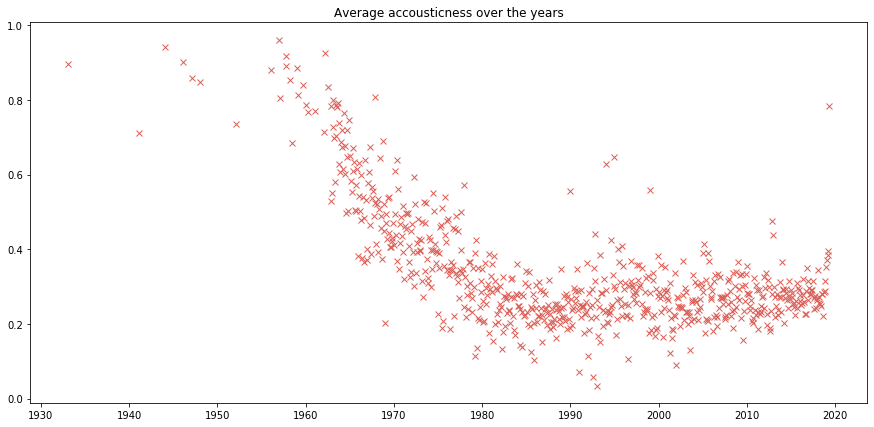

In [18]:
plt.figure(figsize=(15,7))
plt.title('Average accousticness over the years')
plt.plot(acoustic_features_df.acousticness.resample('M').mean(),'x');

## Average loudness

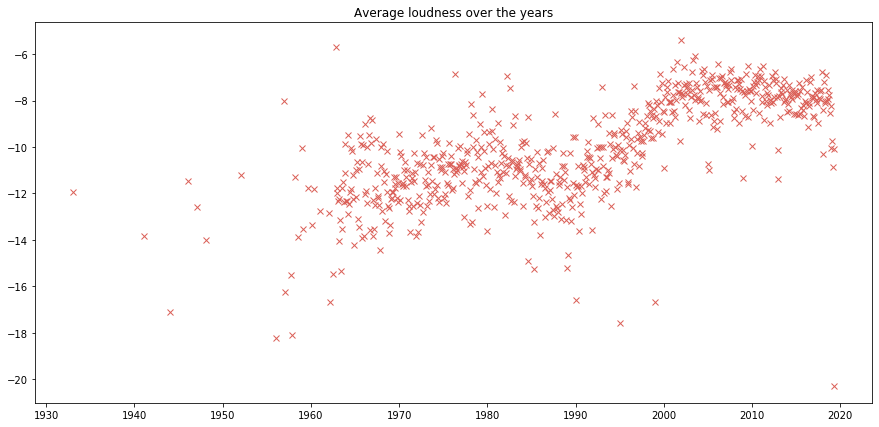

In [19]:
plt.figure(figsize=(15,7))
plt.title('Average loudness over the years')
plt.plot(acoustic_features_df.loudness.resample('M').mean(),'x');

## Most used key

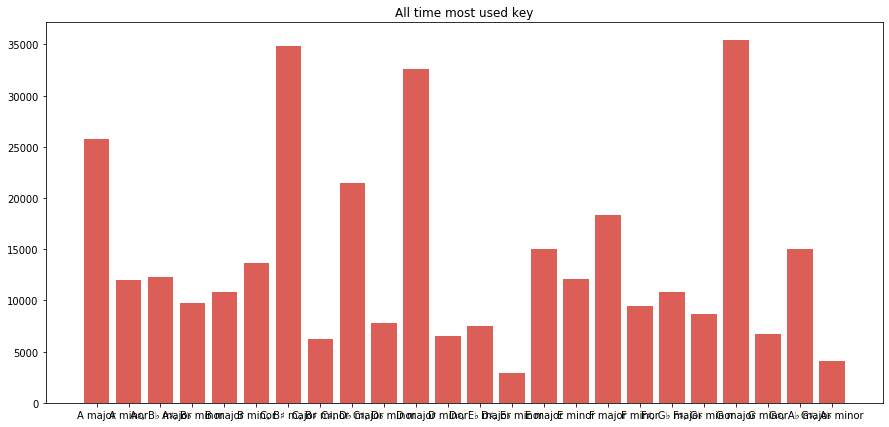

In [20]:
plt.figure(figsize=(15,7))
keys_count=acoustic_features_df.groupby(acoustic_features_df.pitch_mode).count().id
x,y=zip(*keys_count.items())
plt.title('All time most used key')
plt.bar(x,y);

No handles with labels found to put in legend.


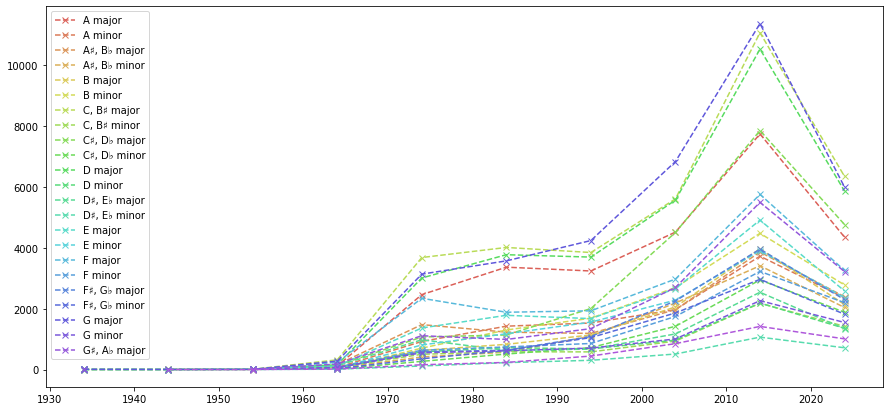

In [21]:
plt.figure(figsize=(15,7))
pitch_per_decade=acoustic_features_df.resample('10Y').pitch_mode.value_counts()
pitch_per_decade=pitch_per_decade.unstack(level=-1)
for pitch in list(pitch_per_decade.columns.values):
    plt.legend()
    plt.grid()
    plt.plot(pitch_per_decade[pitch],'--x',label=pitch);

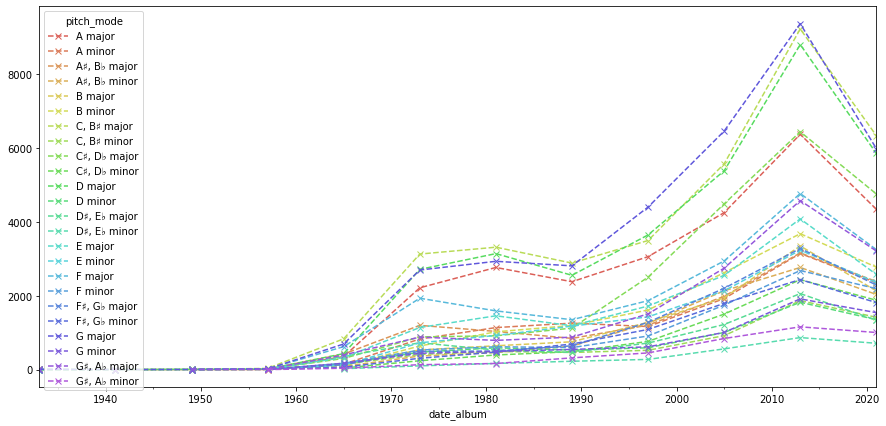

In [28]:
pitch_per_decade=acoustic_features_df.resample('8Y').pitch_mode.value_counts()
pitch_per_decade=pitch_per_decade.unstack(level=-1)
pitch_per_decade.plot(figsize=(15,7),ls='--',marker='x');

In [23]:
# acoustic_features_df[["key"]].pivot(["key"])
# # resample('5Y')

## Danceability and others

In [ ]:
pitch_per_year=acoustic_features_df.to_period('Y').groupby('date')['danceability'].mean()
pitch_per_year.plot(figsize=(15,5),ls='--',marker='x',title='Danceability evolution');

In [ ]:
pitch_per_year=acoustic_features_df.to_period('Y').groupby('date')['speechiness'].mean()
pitch_per_year.plot(figsize=(15,5),ls='--',marker='x',title='Speechiness evolution');

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words.

In [ ]:
pitch_per_year=acoustic_features_df.to_period('Y').groupby('date')['valence'].mean()
pitch_per_year.plot(figsize=(15,5),ls='--',marker='x',title='Valence evolution');

float 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

In [ ]:
pitch_per_year=acoustic_features_df.to_period('Y').groupby('date')['tempo'].mean()
pitch_per_year.plot(figsize=(15,5),ls='--',marker='x',title='Tempo evolution');

In [ ]:
pitch_per_year=acoustic_features_df.to_period('Y').groupby('date')['energy'].mean()
pitch_per_year.plot(figsize=(15,5),ls='--',marker='x',title='Energy evolution');

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [ ]:
acoustic_features_df.loc['1940':'1950'].tempo.plot(linestyle='',marker='x')


In [ ]:
acoustic_features_df.loc['1940-01-01':'1950-01-01'].artist.unique()